### ИМПОРТ БИБЛИОТЕК

In [64]:
# Импорт библиотек

import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn import preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble 
from sklearn import model_selection
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2  

%matplotlib inline
plt.style.use('seaborn')

In [14]:
# Определим кодировку датасета

# enc = chardet.detect(open('Тестовое задание 2023-09-07.csv', 'rb').read())
# print(enc['encoding'])

### ЗАГРУЗКА ДАННЫХ

In [15]:
df=pd.read_csv('Тестовое задание 2023-09-07.csv', encoding='windows-1251', sep=';')
print(df.shape)

(14491, 22)


### ЗАДАНИЕ  

Это данные по страховым убыткам (то, что компания платила клиентам).  
Далее некоторые из убытков проверялись службой безопасности - колонка "Проверка".  

Если была проверка и стоит "Да", значит было выявлено мошенничество (к примеру сначала было повреждение машины, потом уже ее застраховали, или застраховали, поменяли новый бампер на побитый и заявили убыток и тд).
Если стоит 0 - мошенничества не обнаружено.  

Задача - минимизировать число проверок таким образом, чтобы число выявленных мошеннических убытков упало не более чем на 20%.

### 3. ИССЛЕДОВАНИЕ ДАННЫХ

In [16]:
display(df.head(10))
print(df.shape)

,тип убытка,Номер убытка,Номер претензии,Дата события,Время ДТП,Место ДТП,Вид извещения о событии,Характер события,Оформлено сотрудниками ГИБДД,Адрес ДТП: Страна,...,Риск,Объект,Основание для претензии,Характер ущерба,Форма воозмещения,Основание для регресса,Дата предотсавления полного пакета документов,сумма,проверка,мошенник
0,У,У-000-01799744/16,У-000-01799744/16/3,20.06.2012,13:00:00,Автомагистраль,Заявление,ДТП с участием 2-х ТС с пострадавшими,ДА,Россия,...,Риски ОСАГО,Man TGA,Судебное решение,Смерть в результате ДТП,Денежная,NaN,NaN,12 500,Да,0
1,У,У-000-01799744/16,У-000-01799744/16/1,20.06.2012,13:00:00,Автомагистраль,Заявление,ДТП с участием 2-х ТС с пострадавшими,ДА,Россия,...,Риски ОСАГО,Man TGA,Судебное решение,Смерть в результате ДТП,Денежная,NaN,NaN,12 500,Да,0
2,У,У-000-01799744/16,У-000-01799744/16/2,20.06.2012,13:00:00,Автомагистраль,Заявление,ДТП с участием 2-х ТС с пострадавшими,ДА,Россия,...,Риски ОСАГО,Man TGA,Заявление от потерпевшего,Прочие повреждения,Денежная,NaN,19.10.2016,120 000,Да,0
3,ПВУ,ПВУ-991-077356/15,ПВУ-991-077356/15/1,17.03.2013,10:10:00,В пределах дорог (кроме автомагистралей),Заявление,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Риски ОСАГО,Porsche Cayenne S <K438KH177>,Заявление от потерпевшего,Прочие повреждения,NaN,NaN,01.04.2015,33 788,NaN,NaN
4,У,У-991-01781532/16,У-991-01781532/16/1,26.03.2013,18:00:00,В пределах дорог (кроме автомагистралей),Заказное письмо,ДТП с участием более 2-х ТС с пострадавшими,ДА,Россия,...,Риски ОСАГО,Chevrolet Niva,Заявление от потерпевшего,Прочие повреждения,Денежная,NaN,18.03.2016,120 000,Да,0
5,ПВУ,ПВУ-991-079454/15,ПВУ-991-079454/15/3,27.03.2013,9:35:00,В пределах дорог (кроме автомагистралей),Претензия другой СК,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Риски ОСАГО,Toyota Corolla,Судебное решение,Прочие повреждения,Денежная,NaN,NaN,11 236,NaN,NaN
6,ПВУ,ПВУ-991-079454/15,ПВУ-991-079454/15/1,27.03.2013,9:35:00,В пределах дорог (кроме автомагистралей),Претензия другой СК,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Риски ОСАГО,Toyota Corolla,Заявление от потерпевшего,Прочие повреждения,NaN,NaN,21.04.2015,29 613,NaN,NaN
7,ПВУ,ПВУ-991-079454/15,ПВУ-991-079454/15/2,27.03.2013,9:35:00,В пределах дорог (кроме автомагистралей),Претензия другой СК,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Риски ОСАГО,Toyota Corolla,Заявление от потерпевшего,Прочие повреждения,NaN,NaN,NaN,11 236,NaN,NaN
8,ПВУ,ПВУ-991-101817/16,ПВУ-991-101817/16/1,16.04.2013,17:25:00,В пределах дорог (кроме автомагистралей),Заявление,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Риски ОСАГО,Nissan Tiida <С497СВ36>,Заявление от потерпевшего,Прочие повреждения,Денежная,NaN,16.05.2016,29 784,Да,0
9,ПВУ,ПВУ-580-101539/16,ПВУ-580-101539/16/1,04.05.2013,13:00:00,Автомагистраль,Заказное письмо,ДТП с участием 2-х ТС с пострадавшими,ДА,Россия,...,Риски ОСАГО,Ваз 2107 4 <Е089РВ>,Заявление от потерпевшего,Предельные повреждения,Денежная,NaN,NaN,NaN,Да,0


(14491, 22)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14491 entries, 0 to 14490
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   тип убытка                                     14491 non-null  object
 1   Номер убытка                                   14491 non-null  object
 2   Номер претензии                                14491 non-null  object
 3   Дата события                                   14491 non-null  object
 4   Время ДТП                                      14491 non-null  object
 5   Место ДТП                                      14491 non-null  object
 6   Вид извещения о событии                        14491 non-null  object
 7   Характер события                               14491 non-null  object
 8   Оформлено сотрудниками ГИБДД                   14491 non-null  object
 9   Адрес ДТП: Страна                              14491 non-null

In [18]:
df.describe()

,тип убытка,Номер убытка,Номер претензии,Дата события,Время ДТП,Место ДТП,Вид извещения о событии,Характер события,Оформлено сотрудниками ГИБДД,Адрес ДТП: Страна,...,Риск,Объект,Основание для претензии,Характер ущерба,Форма воозмещения,Основание для регресса,Дата предотсавления полного пакета документов,сумма,проверка,мошенник
count,14491,14491,14491,14491,14491,14491,14491,14491,14491,14491,...,14491,14491,14488,14486,11597,436,10971,13243,6434,6434
unique,2,10748,14476,1305,803,10,5,16,2,1,...,1,9024,7,20,2,12,847,9705,1,3
top,ПВУ,У-991-01850093/17,У-991-01742715/15/2,22.01.2016,13:00:00,В пределах дорог (кроме автомагистралей),Заявление,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Риски ОСАГО,Kia Rio 0 <>,Заявление от потерпевшего,Прочие повреждения,Денежная,"Алкогольное, наркотическое или иное токсическо...",23.01.2017,400 000,Да,0
freq,12320,9,2,40,226,11006,11223,12498,11870,14491,...,14491,102,13537,12937,11456,148,35,570,6434,5828


#### 3.1. Количество пропусков

In [19]:
df.isna().sum().sort_values(ascending = False)

Основание для регресса                           14055
мошенник                                          8057
проверка                                          8057
Дата предотсавления полного пакета документов     3520
Форма воозмещения                                 2894
сумма                                             1248
Характер ущерба                                      5
Основание для претензии                              3
Номер убытка                                         0
Объект                                               0
Риск                                                 0
тип убытка                                           0
Дата регистрации претензии                           0
Адрес ДТП: Страна                                    0
Оформлено сотрудниками ГИБДД                         0
Характер события                                     0
Вид извещения о событии                              0
Место ДТП                                            0
Время ДТП 

#### 3.2. Количество уникальных значений

In [20]:
df[df.columns.to_list()].nunique().sort_values(ascending = False)

Номер претензии                                  14476
Номер убытка                                     10748
Договор                                          10248
сумма                                             9705
Объект                                            9024
Дата события                                      1305
Дата регистрации претензии                         866
Дата предотсавления полного пакета документов      847
Время ДТП                                          803
Характер ущерба                                     20
Характер события                                    16
Основание для регресса                              12
Место ДТП                                           10
Основание для претензии                              7
Вид извещения о событии                              5
мошенник                                             3
Форма воозмещения                                    2
Оформлено сотрудниками ГИБДД                         2
тип убытка

#### 3.3. Поиск и удаление дубликатов

In [21]:
#Количество дубликатов
print(df.shape)
df[df.duplicated()].shape
df.drop_duplicates(inplace = True)
print(df.shape)

(14491, 22)
(14490, 22)


#### 3.4. Обработка пропусков и изменение типов данных в признаках


In [22]:
# Значение np.nan в признаке "Основание для регресса" соответствует тому, что в основание для регресса отстутсвует
# Поэтому заменим пропуски в признаке "Основание для регресса" на "Нет основания"

df['Основание для регресса'].fillna(value = 'Нет основания', inplace = True)
print('Число пропусков в признаке "Основание для регресса" -', df['Основание для регресса'].isna().sum())  
print('Число уникальных значений в признаке "Основание для регресса" - ', df['Основание для регресса'].nunique())

Число пропусков в признаке "Основание для регресса" - 0
Число уникальных значений в признаке "Основание для регресса" -  13


In [23]:
# Значение np.nan в признаке "проверка" соответствует тому, что проверка не проводилась
# Поэтому заменим пропуски в признаке "проверка" на 0, а значение "Да" на 1, и сделаем из него категориальный признак

df['проверка'].fillna(value = 0, inplace = True)
df['проверка'].replace('Да', 1, inplace = True)
df['проверка'] = df['проверка'].astype('category')
print('Число пропусков в признаке "проверка" -', df['проверка'].isna().sum())  
print('Число уникальных значений в признаке "проверка" - ', df['проверка'].nunique())

Число пропусков в признаке "проверка" - 0
Число уникальных значений в признаке "проверка" -  2


In [24]:
# Значение np.nan в признаке "мошенник" соответствует тому, что проверка не проводилась
# Поэтому заменим пропуски в признаке "мошенник" на "Проверка не проводилась"

df['мошенник'].fillna(value = 'Проверка не проводилась', inplace = True)
print('Число пропусков в признаке "мошенник" -', df['мошенник'].isna().sum())  
print('Число уникальных значений в признаке "мошенник" - ', df['мошенник'].nunique())

Число пропусков в признаке "мошенник" - 0
Число уникальных значений в признаке "мошенник" -  4


In [25]:
# Выведем уникальные значеня признака "мошениик"

df['мошенник'].value_counts()

Проверка не проводилась    8056
0                          5828
Да                          535
да                           71
Name: мошенник, dtype: int64

In [26]:
# Заменим "да" и "Да" на 1, 'Проверка не проводилась' на 2. Также сделаем из этого признака категориальный

df['мошенник'].replace(('Да', 'да', 'Проверка не проводилась'), (1, 1, 2), inplace = True)
df['мошенник'] = df['мошенник'].astype('category')
df['мошенник'].value_counts()


2    8056
0    5828
1     606
Name: мошенник, dtype: int64

In [27]:
# Значение np.nan в признаке "Дата предотсавления полного пакета документов" соответствует тому, что документы не были предоставлены
# Поэтому заменим пропуски в признаке "Дата предотсавления полного пакета документов" на 0 

df['Дата предотсавления полного пакета документов'].fillna(value = 0, inplace = True)
print('Число пропусков в признаке "Дата предотсавления полного пакета документов" -', 
      df['Дата предотсавления полного пакета документов'].isna().sum())

Число пропусков в признаке "Дата предотсавления полного пакета документов" - 0


In [28]:
# Значение np.nan в признаке "Форма воозмещения" заменим на "Иная" и сделаем из него категориальный признак

df['Форма воозмещения'].fillna(value = 'Иная', inplace = True)
df['Форма воозмещения'] = df['Форма воозмещения'].astype('category')
print('Число пропусков в признаке "Форма воозмещения" -', df['Форма воозмещения'].isna().sum())  
print('Число уникальных значений в признаке "Форма воозмещения" - ', df['Форма воозмещения'].nunique())


Число пропусков в признаке "Форма воозмещения" - 0
Число уникальных значений в признаке "Форма воозмещения" -  3


In [29]:
# Значение np.nan в признаке "сумма" соответствует тому, что страховка не была выплачена
# Поэтому заменим пропуски в признаке "сумма" на 0 и переведем все значения данного признака в int

df['сумма'].fillna(value = '0', inplace = True)
df['сумма'] = df['сумма'].apply(lambda x: x.replace(' ', ''))
df['сумма'] = df['сумма'].apply(lambda x: int(x))
print('Число пропусков в признаке "сумма" -', df['сумма'].isna().sum())  
display(df['сумма'].describe())

Число пропусков в признаке "сумма" - 0


count     14490.000000
mean      83785.123464
std      109003.333821
min           0.000000
25%       13967.250000
50%       36094.000000
75%      106937.500000
max      831840.000000
Name: сумма, dtype: float64

In [30]:
# Заменим np.nan в признаке "Характер ущерба" на наиболее часто встречающееся значение "Прочие повреждения" 
# И сделаем из него категориальный пизнак

df['Характер ущерба'].fillna(value = 'Прочие повреждения', inplace = True)
df['Характер ущерба'] = df['Характер ущерба'].astype('category')
print('Число пропусков в признаке "Характер ущерба" -', df['Характер ущерба'].isna().sum())  
print('Число уникальных значений в признаке "Характер ущерба" - ', df['Характер ущерба'].nunique())

Число пропусков в признаке "Характер ущерба" - 0
Число уникальных значений в признаке "Характер ущерба" -  20


In [31]:
# Заменим np.nan в признаке "Основание для претензии" на наиболее часто встречающееся значение "Заявление от потерпевшего" 
# И сделаем из него категориальный пизнак

df['Основание для претензии'].fillna(value = 'Заявление от потерпевшего', inplace = True)
df['Основание для претензии'] = df['Основание для претензии'].astype('category')
print('Число пропусков в признаке "Основание для претензии" -', df['Основание для претензии'].isna().sum())  
print('Число уникальных значений в признаке "Основание для претензии" - ', df['Основание для претензии'].nunique())

Число пропусков в признаке "Основание для претензии" - 0
Число уникальных значений в признаке "Основание для претензии" -  7


In [32]:
# Пропуски по признакам

df.isna().sum().sort_values(ascending = False)

тип убытка                                       0
Номер убытка                                     0
проверка                                         0
сумма                                            0
Дата предотсавления полного пакета документов    0
Основание для регресса                           0
Форма воозмещения                                0
Характер ущерба                                  0
Основание для претензии                          0
Объект                                           0
Риск                                             0
Договор                                          0
Дата регистрации претензии                       0
Адрес ДТП: Страна                                0
Оформлено сотрудниками ГИБДД                     0
Характер события                                 0
Вид извещения о событии                          0
Место ДТП                                        0
Время ДТП                                        0
Дата события                   

#### 3.5. Создание новых признаков

Сами по себе признаки "Дата события", "Дата регистрации претензии", "Дата предотсавления полного пакета документов" и "Время ДТП" не несут полезной информации.  
Создадим на основе вышеперечисленных признаков следующие признаки:  
1. "Событие-регистрация" - количество дней с даты наступления события до даты регистрации
2. "Событие-докум" - количество дней с даты наступления события до даты предоставления полного пакета документов
3. "Время суток" - категориальный признак ["утро", "день", "вечер", "ночь"] в зависимости от времени ДТП

In [33]:
# Переведем тип признаков "Дата события", "Дата регистрации претензии", "Дата предоставления полного пакета документов",
# "Время ДТП" в тип datetime

df['Дата события'] = pd.to_datetime(df['Дата события'], dayfirst = True)
df['Дата регистрации претензии'] = pd.to_datetime(df['Дата регистрации претензии'], dayfirst = True)
df['Дата предотсавления полного пакета документов'] = pd.to_datetime(df['Дата предотсавления полного пакета документов'], dayfirst = True)
df['Время ДТП'] = pd.to_datetime(df['Время ДТП'], format = '%H:%M:%S').dt.time
df.sample(3)

,тип убытка,Номер убытка,Номер претензии,Дата события,Время ДТП,Место ДТП,Вид извещения о событии,Характер события,Оформлено сотрудниками ГИБДД,Адрес ДТП: Страна,...,Риск,Объект,Основание для претензии,Характер ущерба,Форма воозмещения,Основание для регресса,Дата предотсавления полного пакета документов,сумма,проверка,мошенник
4626,ПВУ,ПВУ-991-095865/16,ПВУ-991-095865/16/3,2015-12-17,16:50:00,В пределах дорог (кроме автомагистралей),Заказное письмо,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Риски ОСАГО,Toyota Avensis 0 <М026НЕ34>,Судебное решение,Прочие повреждения,Денежная,Нет основания,1970-01-01,24095,1,0
7977,ПВУ,ПВУ-991-106184/16,ПВУ-991-106184/16/1,2016-08-29,21:30:00,В пределах дорог (кроме автомагистралей),Заявление,ДТП с участием 2-х ТС без пострадавших,НЕТ,Россия,...,Риски ОСАГО,Volkswagen Passat В8,Заявление от потерпевшего,Прочие повреждения,Денежная,Нет основания,2016-09-02,7900,0,2
7894,ПВУ,ПВУ-991-106006/16,ПВУ-991-106006/16/1,2016-08-22,18:50:00,В пределах дорог (кроме автомагистралей),Заявление,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Риски ОСАГО,Mitsubishi Lancer 0 <а308кт199>,Заявление от потерпевшего,Прочие повреждения,Денежная,Нет основания,2016-09-02,8630,0,2


In [34]:
def time_to_part_of_the_day(time:pd.datetime) -> 'str':
    if pd.to_datetime('06:00:00').time() <= time < pd.to_datetime('12:00:00').time():
        return 'morning'
    elif pd.to_datetime('12:00:00').time() <= time < pd.to_datetime('18:00:00').time():
        return 'day'
    elif pd.to_datetime('18:00:00').time() <= time < pd.to_datetime('23:59:59').time():
        return 'evening'
    elif pd.to_datetime('00:00:00').time() <= time < pd.to_datetime('06:00:00').time():
        return 'night'

C:\Users\l-pla\AppData\Local\Temp\ipykernel_17496\4045697022.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  def time_to_part_of_the_day(time:pd.datetime) -> 'str':


In [35]:
# Создадим признаки 'Событие-регистрация', 'Событие-докум', 'Время суток'

df['Событие-регистрация'] = df['Дата регистрации претензии'] - df['Дата события']
df['Событие-регистрация'] = df['Событие-регистрация'].dt.days
df['Событие-докум'] = df['Дата предотсавления полного пакета документов'] - df['Дата события']
df['Событие-докум'] = df['Событие-докум'].dt.days
df['Событие-докум'] = df['Событие-докум'].apply(lambda x: 0 if x < 0 else x)
df['Время суток'] = df['Время ДТП'].apply(time_to_part_of_the_day)
df['Время суток'] = df['Время суток'].astype('category')
df.sample(3)

,тип убытка,Номер убытка,Номер претензии,Дата события,Время ДТП,Место ДТП,Вид извещения о событии,Характер события,Оформлено сотрудниками ГИБДД,Адрес ДТП: Страна,...,Характер ущерба,Форма воозмещения,Основание для регресса,Дата предотсавления полного пакета документов,сумма,проверка,мошенник,Событие-регистрация,Событие-докум,Время суток
10753,ПВУ,ПВУ-991-115417/17,ПВУ-991-115417/17/1,2017-02-28,13:45:00,В пределах дорог (кроме автомагистралей),Заявление,ДТП с участием 2-х ТС без пострадавших,НЕТ,Россия,...,Прочие повреждения,Денежная,Нет основания,2017-03-16,12680,0,2,1,16,day
9109,ПВУ,ПВУ-230-110355/16,ПВУ-230-110355/16/3,2016-11-18,09:00:00,В пределах дорог (кроме автомагистралей),Заказное письмо,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Прочие повреждения,Денежная,Нет основания,1970-01-01,167000,1,0,131,0,morning
3624,ПВУ,ПВУ-740-090248/15,ПВУ-740-090248/15/1,2015-10-05,11:30:00,В пределах дорог (кроме автомагистралей),Заказное письмо,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,Прочие повреждения,Иная,Нет основания,1970-01-01,0,1,0,4,0,morning


#### 3.6. Кодирование признаков

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14490 entries, 0 to 14490
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   тип убытка                                     14490 non-null  object        
 1   Номер убытка                                   14490 non-null  object        
 2   Номер претензии                                14490 non-null  object        
 3   Дата события                                   14490 non-null  datetime64[ns]
 4   Время ДТП                                      14490 non-null  object        
 5   Место ДТП                                      14490 non-null  object        
 6   Вид извещения о событии                        14490 non-null  object        
 7   Характер события                               14490 non-null  object        
 8   Оформлено сотрудниками ГИБДД                   14490 non

In [37]:
df[df.columns.to_list()].nunique().sort_values(ascending = False)

Номер претензии                                  14476
Номер убытка                                     10748
Договор                                          10248
сумма                                             9706
Объект                                            9024
Дата события                                      1305
Дата регистрации претензии                         866
Дата предотсавления полного пакета документов      848
Время ДТП                                          803
Событие-регистрация                                639
Событие-докум                                      478
Характер ущерба                                     20
Характер события                                    16
Основание для регресса                              13
Место ДТП                                           10
Основание для претензии                              7
Вид извещения о событии                              5
Время суток                                          4
мошенник  

In [38]:
# Закодируем интересующие нас категориальные признаки бинарным кодированием

nums_features_list = ['сумма', 'Событие-регистрация', 'Событие-докум']

cat_features_list_for_encoder = ['Объект','тип убытка', 'Характер события', 'Характер ущерба',
                     'Основание для регресса', 'Место ДТП', 'Основание для претензии', 'Вид извещения о событии',
                     'Время суток', 'Форма воозмещения', 'Оформлено сотрудниками ГИБДД']

bin_encoder = ce.BinaryEncoder(cols = cat_features_list_for_encoder) 
type_bin = bin_encoder.fit_transform(df[cat_features_list_for_encoder])
df = pd.concat([df, type_bin], axis=1)
df.sample(3)

,тип убытка,Номер убытка,Номер претензии,Дата события,Время ДТП,Место ДТП,Вид извещения о событии,Характер события,Оформлено сотрудниками ГИБДД,Адрес ДТП: Страна,...,Вид извещения о событии_0,Вид извещения о событии_1,Вид извещения о событии_2,Время суток_0,Время суток_1,Время суток_2,Форма воозмещения_0,Форма воозмещения_1,Оформлено сотрудниками ГИБДД_0,Оформлено сотрудниками ГИБДД_1
249,ПВУ,ПВУ-991-084209/15,ПВУ-991-084209/15/1,2014-11-18,20:45:00,Другие территории,Заявление,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,0,0,1,0,1,1,1,0,0,1
5010,ПВУ,ПВУ-630-096414/16,ПВУ-630-096414/16/3,2016-01-14,21:45:00,В пределах дорог (кроме автомагистралей),Заявление,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,0,0,1,0,1,1,0,1,0,1
871,ПВУ,ПВУ-991-075586/15,ПВУ-991-075586/15/1,2015-02-20,20:20:00,В пределах дорог (кроме автомагистралей),Заявление,ДТП с участием 2-х ТС без пострадавших,ДА,Россия,...,0,0,1,0,1,1,1,0,0,1


#### 3.7. Удаление неинформативных признаков

In [39]:
# Удалим закодированные категориальные признаки 

df.drop(columns = cat_features_list_for_encoder, axis = 1, inplace = True)
df.sample(3)

,Номер убытка,Номер претензии,Дата события,Время ДТП,Адрес ДТП: Страна,Дата регистрации претензии,Договор,Риск,Дата предотсавления полного пакета документов,сумма,...,Вид извещения о событии_0,Вид извещения о событии_1,Вид извещения о событии_2,Время суток_0,Время суток_1,Время суток_2,Форма воозмещения_0,Форма воозмещения_1,Оформлено сотрудниками ГИБДД_0,Оформлено сотрудниками ГИБДД_1
11859,ПВУ-610-119198/17,ПВУ-610-119198/17/1,2017-05-25,21:45:00,Россия,2017-05-29,ЕЕЕ-0724941290,Риски ОСАГО,1970-01-01,153007,...,0,0,1,0,1,1,0,1,0,1
6274,ПВУ-740-100992/16,ПВУ-740-100992/16/1,2016-04-12,19:55:00,Россия,2016-04-22,ЕЕЕ-0715954056,Риски ОСАГО,1970-01-01,0,...,0,1,0,0,1,1,0,1,0,1
6733,ПВУ-991-103023/16,ПВУ-991-103023/16/1,2016-05-24,13:40:00,Россия,2016-06-14,ЕЕЕ-0713598491,Риски ОСАГО,2016-06-23,32036,...,0,1,0,0,0,1,0,1,1,0


In [40]:
# Удалим признаки с большим количеством уникальных значений и с одним уникальным значением, а также неинформативные признаки

df.drop(columns = ['Номер претензии', 'Номер убытка', 'Договор', 'Дата события', 
                   'Дата регистрации претензии', 'Дата предотсавления полного пакета документов', 
                   'Время ДТП', 'Адрес ДТП: Страна', 'Риск'], axis = 1, inplace = True)

#### 3.8. Мультиколлинеарность

<AxesSubplot:>

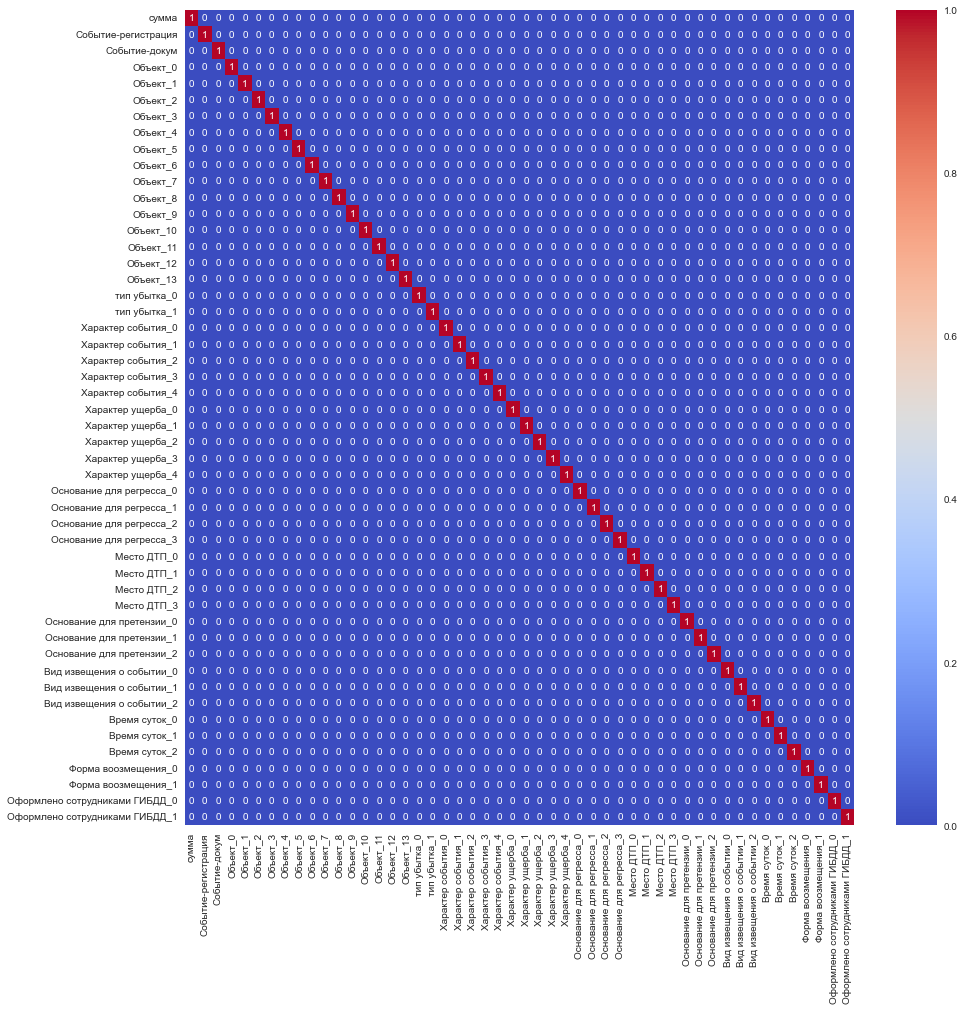

In [41]:
# Изобразим heatmap мультиколлинеарности признаков
plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(df.corr() > 0.8, annot=True, cmap='coolwarm')

#### 3.9. Оценим важность признаков

<AxesSubplot:>

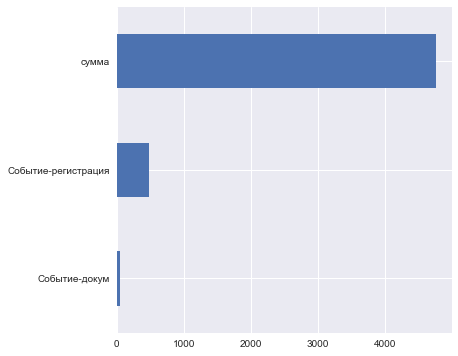

In [42]:
# Оценим значимость числовых признаков, используя тест ANOVA

plt.rcParams['figure.figsize'] = (6,6)
importance_num = pd.Series(f_classif(df[nums_features_list], df.loc[:,'проверка'])[0], index = nums_features_list)
importance_num.sort_values(inplace = True)
importance_num.plot(kind = 'barh')

<AxesSubplot:>

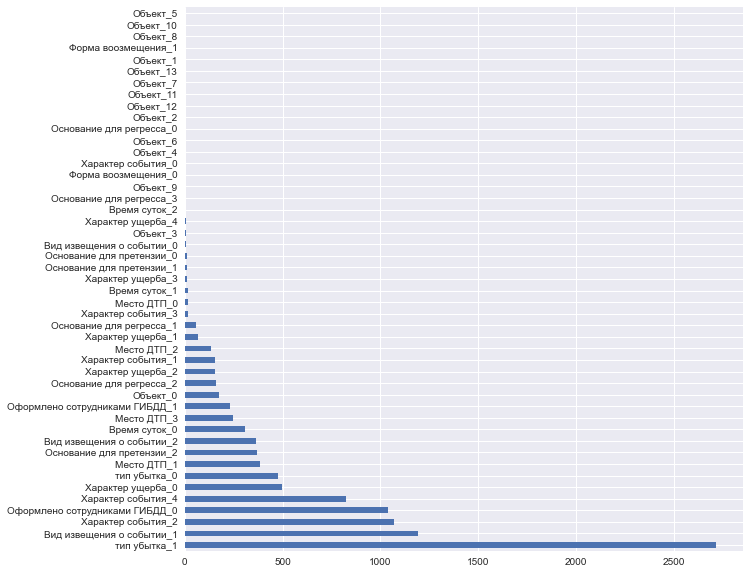

In [43]:
cat_features_list = df.columns.to_list()[5:]

plt.rcParams['figure.figsize'] = (10,10)
importance_cat = pd.Series(chi2(df[cat_features_list], df.loc[:,'проверка'])[0], index=cat_features_list)
importance_cat.sort_values(ascending = False, inplace = True)
importance_cat.plot(kind = 'barh')

In [44]:
# Для построения модели возьмем только ТОП 25 по значимости категориальных фичей по тесту Хi^2

list_drop_cat_features = importance_cat[25:].index.to_list()
df.drop(columns = list_drop_cat_features, axis = 1, inplace = True)
df.sample(3)

,сумма,проверка,мошенник,Событие-регистрация,Событие-докум,Объект_0,тип убытка_0,тип убытка_1,Характер события_1,Характер события_2,...,Место ДТП_2,Место ДТП_3,Основание для претензии_1,Основание для претензии_2,Вид извещения о событии_1,Вид извещения о событии_2,Время суток_0,Время суток_1,Оформлено сотрудниками ГИБДД_0,Оформлено сотрудниками ГИБДД_1
1758,43282,0,2,13,13,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
12567,400000,1,1,3,17,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1588,56507,0,2,22,22,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1


### 4. ПОСТРОЕНИЕ МОДЕЛИ

#### 4.1. Подготовка данных для модели

In [141]:
X = df.drop(['проверка'], axis=1)
y = df['проверка']
print(X.shape, '\n', y.shape)

(14490, 29) 
 (14490,)


In [146]:
# Разделяем тренинговый датасет: 75% трейн и 25 тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
fraud_train = X_train['мошенник']
fraud_test = X_test['мошенник']
X_train = X_train.drop(['мошенник'], axis = 1)
X_test = X_test.drop(['мошенник'], axis = 1)

# Проверяем размерности получившихся датасетов
print(X.shape, '\n', X_train.shape, '\n',  X_test.shape)

(14490, 29) 
 (10867, 28) 
 (3623, 28)


#### 4.2. Построение и оценка модели Random forest

Предположения:  
Думаю, для решения данной задачи хорошо подходит RandomForest.  
Поэтому, чтобы не тратить время на обучение заведомо плохих (логистическая регрессия) и тяжелых моделей будет обучать только RandomForest.

In [147]:
# Обучим на наших данных случайный лес

random_forest = ensemble.RandomForestClassifier(
    n_estimators = 100, #число деревьев
    criterion = 'gini', #критерий эффективности
    min_samples_leaf = 5,
    max_depth = 20, #максимальная глубина дерева
    random_state = 42 #генератор случайных чисел
)
#Обучаем модель 
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [148]:
#Делаем предсказание класса
y_pred = random_forest.predict(X_test)
#Выводим отчет о метриках
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1992
           1       0.90      0.86      0.88      1631

    accuracy                           0.89      3623
   macro avg       0.90      0.89      0.89      3623
weighted avg       0.89      0.89      0.89      3623



Примечание:  
Получили неплохие метрики классификации проверки транзации для модели на базовых настройках.  
Однако, по заданию нам необходимо уменьшить количество проверок, таком образом чтобы число выявленных мошеннических убытков уменьшилось не более чем на 20%.  

Для уменьшения количества проверок можем уменишить recall модели при определении класса 1 (проводить проверку).  
Для этого можем увеличить threshold (порог вероятности) определения класса 1 (по умолчанию 0.5).

In [161]:
# Определим количество выявленных мошеннических убытков в test и train

number_of_fraud_loss_test = fraud_test[fraud_test == 1].shape[0]
number_of_fraud_loss_test

144

#### 4.3. Оптимальный порог вероятности

In [163]:
# Построим оптимальную модель 

y_proba_pred = random_forest.predict_proba(X_test)[:,1]
y_proba_pred = pd.Series(y_proba_pred) # для удобства сделаем из ndarray pd.Series
recall_scores = []
precision_scores = []
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_pred = y_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    recall_scores.append(metrics.recall_score(y_test, y_pred))
    precision_scores.append(metrics.precision_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))

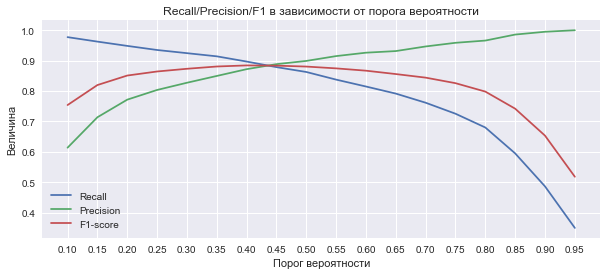

In [187]:
#Визуализируем метрики при различных threshold

fig, ax = plt.subplots(figsize=(10, 4)) 
ax.plot(thresholds, recall_scores, label='Recall')
ax.plot(thresholds, precision_scores, label='Precision')
ax.plot(thresholds, f1_scores, label='F1-score')
 
ax.set_title('Recall/Precision/F1 в зависимости от порога вероятности')
ax.set_xlabel('Порог вероятности')
ax.set_ylabel('Величина')
ax.set_xticks(thresholds) 
ax.legend();

Оптимальный порог вероятности 0.44

In [165]:
threshold_opt = 0.44
y_proba_pred = random_forest.predict_proba(X_test)[:,1]
y_proba_pred = pd.Series(y_proba_pred) # для удобства сделаем из ndarray pd.Series
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

print(metrics.classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1992
           1       0.89      0.88      0.89      1631

    accuracy                           0.90      3623
   macro avg       0.90      0.90      0.90      3623
weighted avg       0.90      0.90      0.90      3623



In [174]:
# Посчитаем количество выявленных мошеннических убытков при оптимальном пороге вероятности

df_number_of_fraud_loss_opt = pd.DataFrame({'проверка':y_pred_opt.values, 'мошенники':fraud_test.values})
number_of_fraud_loss_opt = df_number_of_fraud_loss_opt[df_number_of_fraud_loss_opt['проверка'] == 1]
number_of_fraud_loss_opt = number_of_fraud_loss_opt[number_of_fraud_loss_opt['мошенники'] == 1].shape[0]

number_of_check_opt = y_pred_opt.sum()

number_of_fraud_loss_opt, number_of_check_opt

(133, 1628)

Таким образом модель с оптимальным количеством проверок охватывает 133 * 100% / 144 = 92,4 % мошеннических убытков при числе проверок 1628 или 1628 * 100% / 3623 = 45 % от всех транзакций

#### 4.4. Порог вероятности для минимального числа проверок при падении определения количества мошен. операций не более чем на 20%

In [182]:
y_proba_pred = random_forest.predict_proba(X_test)[:,1]
y_proba_pred = pd.Series(y_proba_pred) # для удобства сделаем из ndarray pd.Series
number_of_fraud_loss_min_check = []
number_of_min_check = []
thresholds = np.arange(0.1, 1, 0.05) # проверим для всего
for threshold in thresholds:
    y_pred = y_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    df_temp = pd.DataFrame({'проверка':y_pred.values, 'мошенники':fraud_test.values})
    df_temp = df_temp[df_temp['проверка'] == 1]
    number_of_fraud_loss_temp = df_temp[df_temp['мошенники'] == 1].shape[0]
    number_of_fraud_loss_min_check.append(number_of_fraud_loss_temp*100/number_of_fraud_loss_test)
    
    number_of_min_check.append(y_pred.sum()*100/y_pred.shape[0])
    

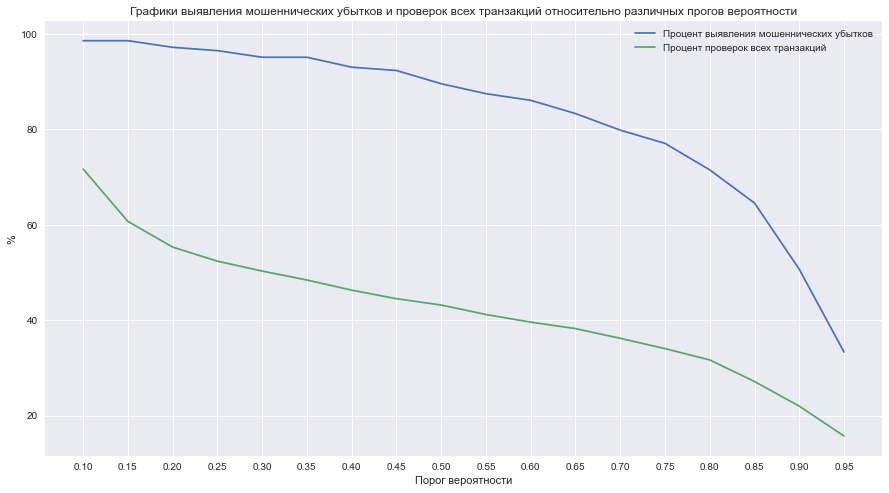

In [186]:
#Визуализируем

fig, ax = plt.subplots(figsize=(15, 8)) 
ax.plot(thresholds, number_of_fraud_loss_min_check, label='Процент выявления мошеннических убытков')
ax.plot(thresholds, number_of_min_check, label='Процент проверок всех транзакций')
 
ax.set_title('Графики выявления мошеннических убытков и проверок всех транзакций относительно различных прогов вероятности')
ax.set_xlabel('Порог вероятности')
ax.set_ylabel('%')
ax.set_xticks(thresholds) 
ax.legend();

Выводы:  
1. Доля выявленных мошеннических убытков в процентах быстро падает при увеличиении порога вероятности более 0.85.
2. Доля проверок транзакций падает относительно плавно.
3. Оптимальным значением порога вероятности принимаем 0.7. 

In [192]:
# Посчитаем метрики для данного порога вероятности

threshold_min = 0.75
y_proba_pred_min = random_forest.predict_proba(X_test)[:,1]
y_proba_pred_min = pd.Series(y_proba_pred_min) # для удобства сделаем из ndarray pd.Series
y_pred_min = y_proba_pred_min.apply(lambda x: 1 if x > threshold_opt else 0)

print(metrics.classification_report(y_test, y_pred_min))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1992
           1       0.96      0.73      0.83      1631

    accuracy                           0.86      3623
   macro avg       0.89      0.85      0.86      3623
weighted avg       0.88      0.86      0.86      3623



При данном пороге вероятностей процент определяемых мошеннических убытков будет равен  80 % при 35% проверок всех транзакций

### 5. СОХРАНЕНИЕ МОДЕЛИ

In [190]:
# Сохраним модель
import joblib

joblib.dump(random_forest, r"model\test_random_forest.joblib")

['model\\test_random_forest.joblib']

### 7. ПРЕДЛОЖЕНИЯ ПО УЛУЧШЕНИЮ МОДЕЛИ

1. В качестве дальнейшего пути улучшения модели можно перебрать различные гиперпараметры, в том числе при помощи optuna.  
2. Также можно использовать более сильные модели например, CatBoost так же с подбором гиперпараметров.